In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [17]:
# Set plot style for consistency
plt.rcParams.update({
    'legend.fontsize': 14,  # Legend font size
    'axes.labelsize': 14,   # Axis label font size
    'xtick.labelsize': 12,  # X-axis tick label size
    'ytick.labelsize': 12   # Y-axis tick label size
})
plt.rcParams['image.cmap'] = 'viridis'

In [45]:
# Load ML.npz file (update the path as needed)
ml_data = np.load('/export/home/yelshiaty/multigrid/runs/doptimaldesign_ML/20250625-115123/ML.npz', allow_pickle=True)
norm_fval = ml_data['norm_fval_ML']
iteration_times = ml_data['iteration_times_ML']
iteration_times[1:] -= 1.0
cc_activated = ml_data['cc_activated']  # Should be shape (num_iters, num_levels)

# Always use the 0-th element for each iteration, regardless of shape
cc_activated_0 = np.array([row[0] if isinstance(row, (list, np.ndarray)) else row for row in cc_activated])

# Find indices where CC failed (0-th level not activated)
cc_failed_idx = np.where(~cc_activated_0)[0]

# Compute cumulative times
cum_times = np.cumsum(iteration_times)

In [19]:
# Load the additional ML variant
ml_data_variant = np.load('/export/home/yelshiaty/multigrid/runs/doptimaldesign_ML/20250624-181103/ML.npz', allow_pickle=True)
norm_fval_variant = ml_data_variant['norm_fval_ML']
iteration_times_variant = ml_data_variant['iteration_times_ML']
cc_activated_variant = ml_data_variant['cc_activated']
cc_activated_0_variant = np.array([row[0] if isinstance(row, (list, np.ndarray)) else row for row in cc_activated_variant])
cc_failed_idx_variant = np.where(~cc_activated_0_variant)[0]
cum_times_variant = np.cumsum(iteration_times_variant)

In [20]:
# Load the second additional ML variant
ml_data_variant2 = np.load('/export/home/yelshiaty/multigrid/runs/doptimaldesign_ML/20250624-181402/ML.npz', allow_pickle=True)
norm_fval_variant2 = ml_data_variant2['norm_fval_ML']
iteration_times_variant2 = ml_data_variant2['iteration_times_ML']
cc_activated_variant2 = ml_data_variant2['cc_activated']
cc_activated_0_variant2 = np.array([row[0] if isinstance(row, (list, np.ndarray)) else row for row in cc_activated_variant2])
cc_failed_idx_variant2 = np.where(~cc_activated_0_variant2)[0]
cum_times_variant2 = np.cumsum(iteration_times_variant2)

In [ ]:
# Load SL.npz file (update the path as needed)
sL_data = np.load('/export/home/yelshiaty/multigrid/runs/doptimaldesign_single/20250624-180735/SL.npz', allow_pickle=True)
norm_fval_SL = sl_data['norm_fval_SL']
iteration_times_SL = sl_data['iteration_times_SL']
# iteration_times_SL[1:] += 0.8
cum_times_SL = np.cumsum(iteration_times_SL)

In [38]:
iteration_times_SL

array([0.        , 1.4696763 , 1.4754446 , 1.47522955, 1.47657971,
       1.47649555, 1.47894983, 1.47639184, 1.48292594, 1.47667556,
       1.47706847, 1.48325543, 1.47623734, 1.47637444, 1.47808557,
       1.48153501, 1.48775058, 1.49184113, 1.49263005, 1.49729471,
       1.50144939, 1.52867823, 1.50618773, 1.53299551, 1.51424556,
       1.51749163, 1.57144003, 1.51753263, 1.52534871, 1.52348809,
       1.52608352])

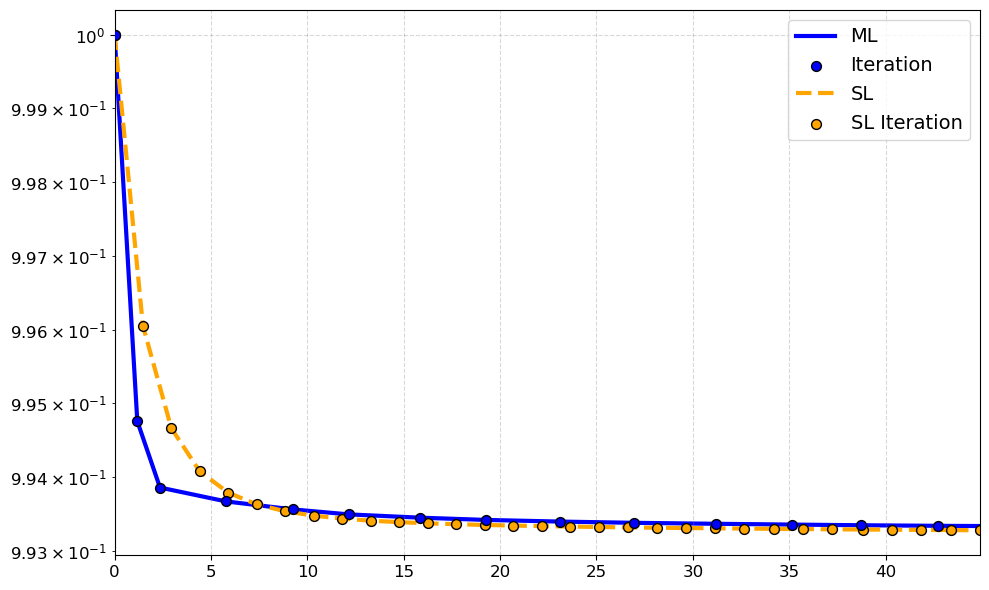

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(cum_times, norm_fval, linestyle='-', linewidth=3, label='ML', color='blue', zorder=1)
plt.scatter(cum_times, norm_fval, color='blue', edgecolors='black', s=50, marker='o', label='Iteration', zorder=3)
# plt.scatter(cum_times[cc_failed_idx], norm_fval[cc_failed_idx],
#             color='red', s=70, marker='x', label='CC Failed', zorder=3)

plt.plot(cum_times_SL, norm_fval_SL, linestyle='--', linewidth=3, label='SL', color='orange', zorder=1)
plt.scatter(cum_times_SL, norm_fval_SL, color='orange', edgecolors='black', s=50, marker='o', label='SL Iteration', zorder=2)

# plt.xlabel('Cumulative CPU Time (seconds)')
# plt.ylabel('Normalised Function Value')
plt.grid(True, linestyle='--', color='gray', alpha=0.3)
plt.yscale('log')
plt.legend(loc='best')
plt.tight_layout()
plt.xlim(0, cum_times_SL[-1])  # <--- Limit to ML time
plt.savefig('ml_vs_sl_comparison_doptimal_no_axis_cropped.png', dpi=300, transparent=True)
plt.show()

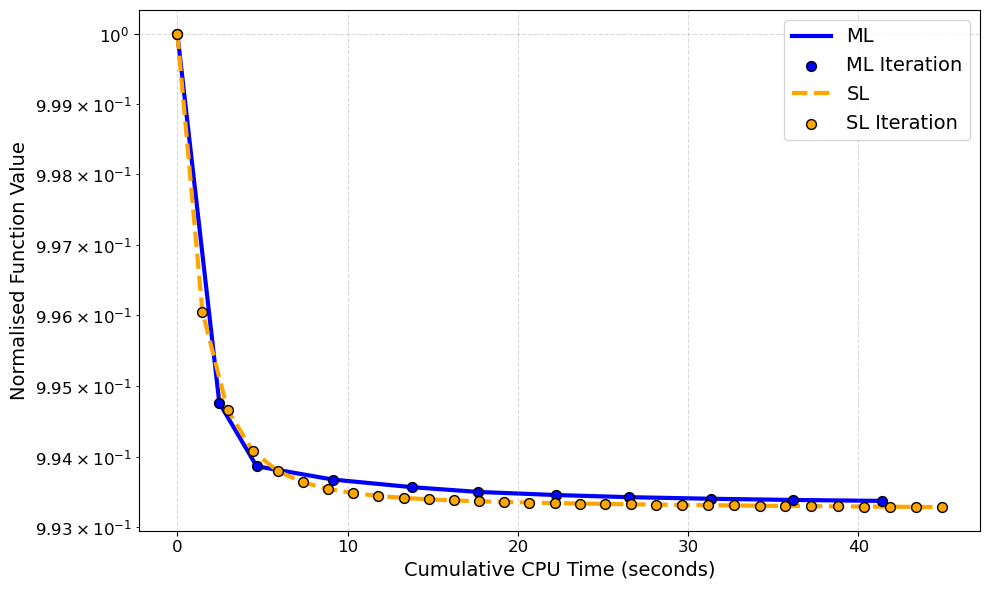

In [43]:
plt.figure(figsize=(10, 6))
# plt.plot(cum_times, norm_fval, linestyle='-', linewidth=3, label='ML', color='blue', zorder=1)
# plt.scatter(cum_times, norm_fval, color='blue', edgecolors='black', s=50, marker='o', label='Iteration', zorder=2)

# First ML variant
plt.plot(cum_times_variant, norm_fval_variant, linestyle='-', linewidth=3, label='ML', color='blue', zorder=1)
plt.scatter(cum_times_variant, norm_fval_variant, color='blue', edgecolors='black', s=50, marker='o', label='ML Iteration', zorder=2)

# Second ML variant
# plt.plot(cum_times_variant2, norm_fval_variant2, linestyle='-', linewidth=3, label='ML (variant 2)', color='purple', zorder=1)
# plt.scatter(cum_times_variant2, norm_fval_variant2, color='purple', edgecolors='black', s=50, marker='o', label='ML (variant 2) Iteration', zorder=2)

plt.plot(cum_times_SL, norm_fval_SL, linestyle='--', linewidth=3, label='SL', color='orange', zorder=1)
plt.scatter(cum_times_SL, norm_fval_SL, color='orange', edgecolors='black', s=50, marker='o', label='SL Iteration', zorder=2)

plt.xlabel('Cumulative CPU Time (seconds)')
plt.ylabel('Normalised Function Value')
plt.grid(True, linestyle='--', color='gray', alpha=0.3)
plt.yscale('log')
plt.legend(loc='best')
plt.tight_layout()
# plt.xlim(0, cum_times_SL[-1])  # <--- Limit to SL time
plt.show()

In [ ]:
angle_scores_ML = np.array([
    np.sum(ml_data['last_iterate_SL'][i * 31:(i + 1) * 31]) for i in range(120)
])
best_angle_indices_ML = np.argsort(angle_scores_ML)[-30:]

In [120]:
import torch
n = 3720
x = torch.ones(n, dtype=torch.float32) / n
x += 0.001 * torch.rand(n, dtype=torch.float32)
x = torch.clamp(x, min=1e-8)
x = x / x.sum()

x = x.numpy()

angle_scores_uniform = np.array([
    np.sum(x[i * 31:(i + 1) * 31]) for i in range(120)
])
best_angle_indices_uniform = np.argsort(angle_scores_uniform)[-15:]

angles_uniform = np.concatenate([
    # np.linspace(0, np.pi, 5, endpoint=False),
    np.linspace(0, np.pi, 120, endpoint=False)[best_angle_indices_uniform]
])

In [108]:
angles_ML = np.concatenate([
    # np.linspace(0, np.pi, 5, endpoint=False),
    np.linspace(0, np.pi, 120, endpoint=False)[best_angle_indices_ML]
])

In [109]:
from PIL import Image
import astra

image = Image.open('/export/home/yelshiaty/multigrid/output images/mario/Mario_small_gray_8levels.png')
image_np = np.array(image)
x_orig = np.array(image.resize((31,31)))/255
image_flat = x_orig.flatten()

vol_geom = astra.create_vol_geom(31, 31)

In [110]:
import scipy.sparse as sp

np.int = np.int32

geometry_SL = astra.create_proj_geom('parallel', 1.0, 31, angles_ML)
proj_id_SL = astra.create_projector('line', geometry_SL, vol_geom)
matrix_id_SL = astra.projector.matrix(proj_id_SL)

H_optimized_SL = sp.csr_matrix(astra.matrix.get(matrix_id_SL))
b_optimized_SL = H_optimized_SL @ image_flat

In [111]:
x_reconstructed_optimized_SL = sp.linalg.lsmr(H_optimized_SL, b_optimized_SL)[0]

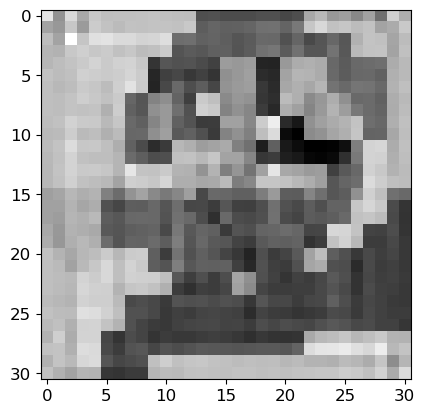

In [112]:
plt.imshow(x_reconstructed_optimized_SL.reshape(31,31), cmap = 'gray')

In [121]:
geometry = astra.create_proj_geom('parallel', 1.0, 31, angles_uniform)
proj_id = astra.create_projector('line', geometry, vol_geom)
matrix_id = astra.projector.matrix(proj_id)

H_uniform = sp.csr_matrix(astra.matrix.get(matrix_id))
b = H_uniform @ image_flat

In [122]:
x_reconstructed = sp.linalg.lsmr(H_uniform, b)[0]

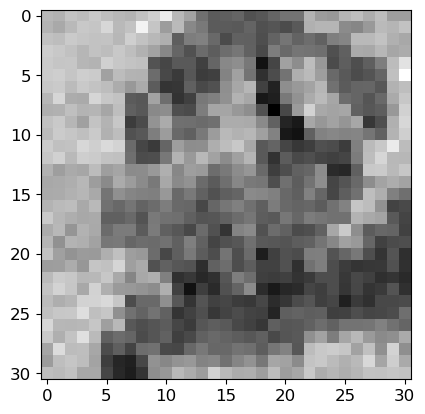

In [124]:
plt.imshow(x_reconstructed.reshape(31,31), cmap = 'gray')
plt.imsave('mario_uniform.png', x_reconstructed.reshape(31,31), cmap = 'gray')